<a href="https://colab.research.google.com/github/ShanzayNoor/Task2_Movie_RatingPrediction_Codsoft/blob/main/MOVIE_RATING_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries and Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder

Load Dataset

In [2]:
M_data=pd.read_csv('/content/IMDb Movies India.csv', encoding='latin-1')
M_data.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


Basic Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
Basic information: None


No of rows and columns: (15509, 10)


            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000




<Axes: >

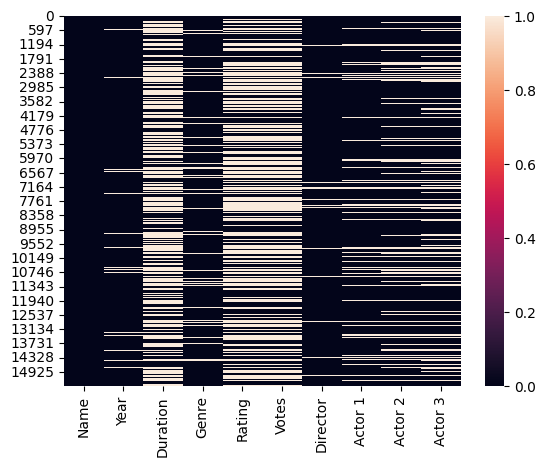

In [3]:
#Basic Information of dataset
print('Basic information:',M_data.info())
print("\n")

#Number of rows and columns in dataset
print('No of rows and columns:',M_data.shape)
print("\n")

#Data Satitical Measures
Stat= M_data.describe()
print(Stat)
print("\n")

#Check number of missing values in each column
Miss_val= M_data.isnull().sum()
res_M= pd.DataFrame({'No of Missing Values':Miss_val.values,}, index=M_data.columns)
res_M

sns.heatmap(M_data.isnull())  #Plot for missing values


Data Cleaning and Preprocessing

In [4]:

# Drop rows with missing values
M_data.dropna(inplace=True)

Miss_val= M_data.isnull().sum()
res_M= pd.DataFrame({'No of Missing Values':Miss_val.values,}, index=M_data.columns)
print(res_M)

#Excluding the "-" from year, min from duration and commas from higher values in votes
M_data['Votes']= M_data['Votes'].astype(str).str.replace(',','').astype(int)
M_data['Year']= M_data['Year'].astype(str).str.strip('()').astype(int)
M_data['Duration']=M_data['Duration'].astype(str).str.strip(' min')
genres = M_data['Genre'].astype(str).str.split(', ', expand=True)
print(genres.head(5))

          No of Missing Values
Name                         0
Year                         0
Duration                     0
Genre                        0
Rating                       0
Votes                        0
Director                     0
Actor 1                      0
Actor 2                      0
Actor 3                      0
        0        1         2
1   Drama     None      None
3  Comedy  Romance      None
5  Comedy    Drama   Musical
6   Drama  Romance       War
8  Horror  Mystery  Thriller


Exploratory Data Analysis

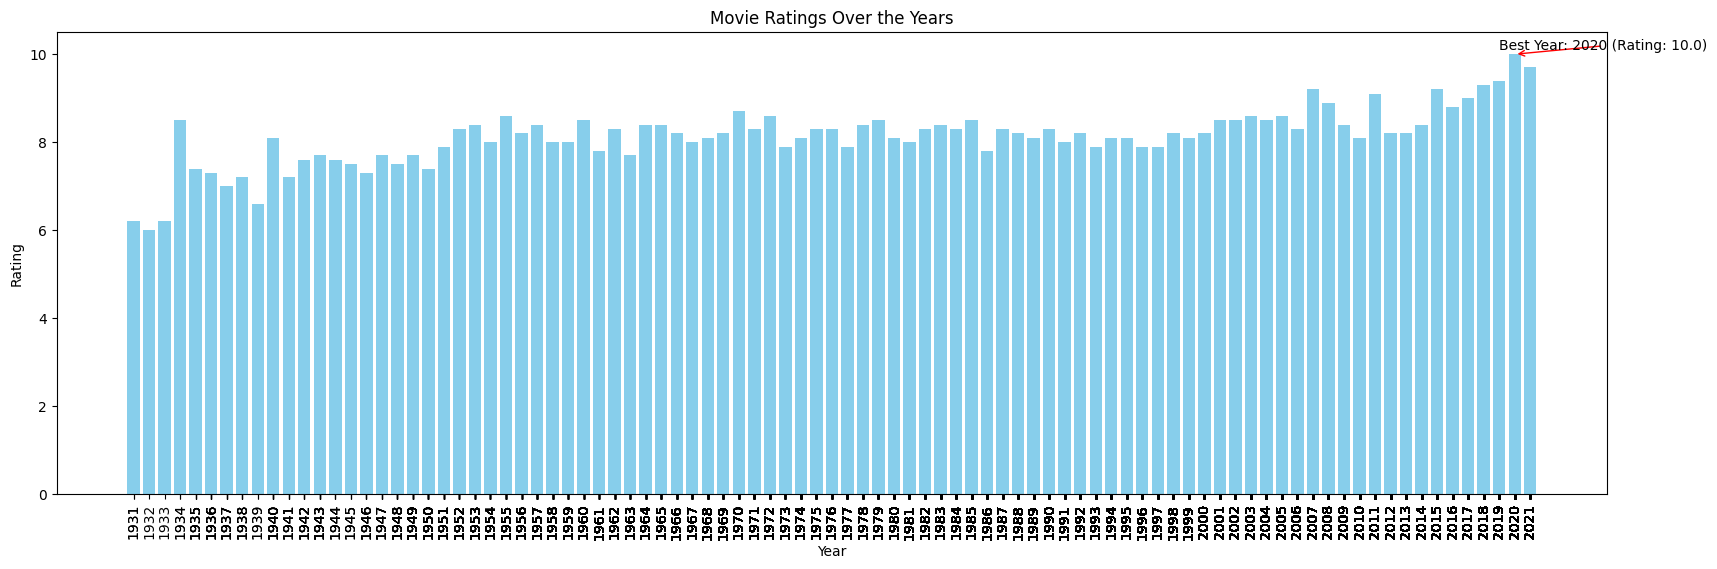

In [6]:
#Year with the best rating
# Create a DataFrame from the dataset
df = pd.DataFrame(M_data)

# Find the year with the best rating
best_year = df.loc[df['Rating'].idxmax()]['Year']
best_rating = df['Rating'].max()

# Create a bar plot to visualize the best year
plt.figure(figsize=(20, 6))
plt.bar(df['Year'], df['Rating'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Movie Ratings Over the Years')
plt.annotate(f'Best Year: {best_year} (Rating: {best_rating})',
             xy=(best_year, best_rating),
             xytext=(best_year - 1, best_rating + 0.1),
             arrowprops=dict(arrowstyle='->', color='red'))
plt.xticks(df['Year'], rotation='vertical')
plt.show()

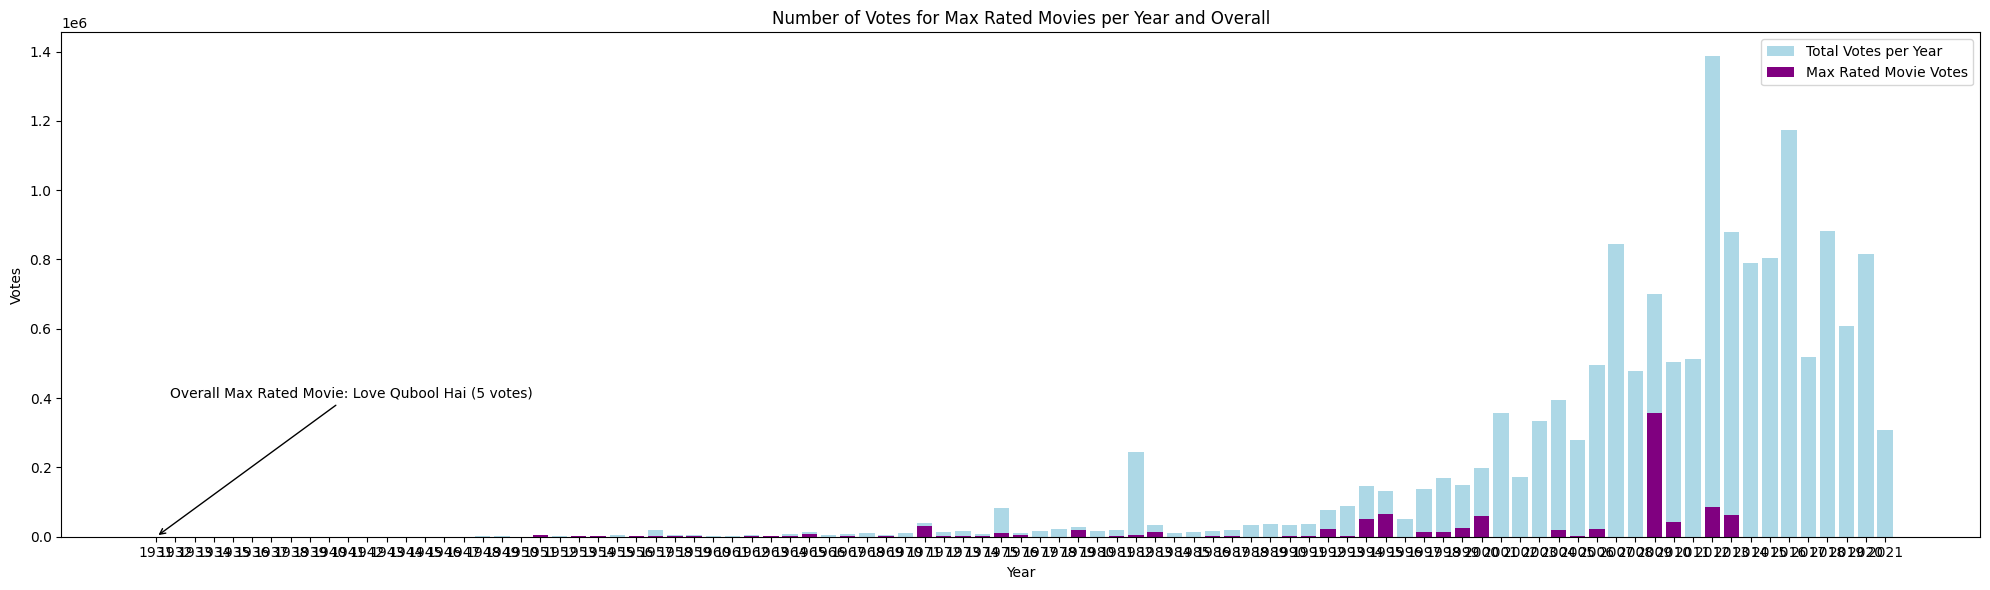

In [7]:
#Counting the number of votes which movies preformed better in rating per year and overall.
# Group by year and calculate max rating and total votes per year
yearly_stats = df.groupby('Year').agg({'Rating': 'max', 'Votes': 'sum'}).reset_index()

# Find the movie titles with max rating per year
max_rated_movies = df.loc[df.groupby('Year')['Rating'].idxmax()][['Year', 'Name', 'Votes']]

# Calculate overall max rated movie and its number of votes
overall_max_rated = df[df['Rating'] == df['Rating'].max()][['Name', 'Votes']].iloc[0]

# Create a bar graph to visualize the number of votes
plt.figure(figsize=(20, 6))
plt.bar(yearly_stats['Year'].astype(str), yearly_stats['Votes'], label='Total Votes per Year', color='lightblue')
plt.bar(max_rated_movies['Year'].astype(str), max_rated_movies['Votes'], label='Max Rated Movie Votes', color='purple')
plt.xlabel('Year')
plt.ylabel('Votes')
plt.title('Number of Votes for Max Rated Movies per Year and Overall')
plt.legend()

# Annotate the overall max rated movie
plt.annotate(f"Overall Max Rated Movie: {overall_max_rated['Name']} ({overall_max_rated['Votes']} votes)",
             xy=(0, overall_max_rated['Votes']), xytext=(10, 100),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.tight_layout()
plt.show()

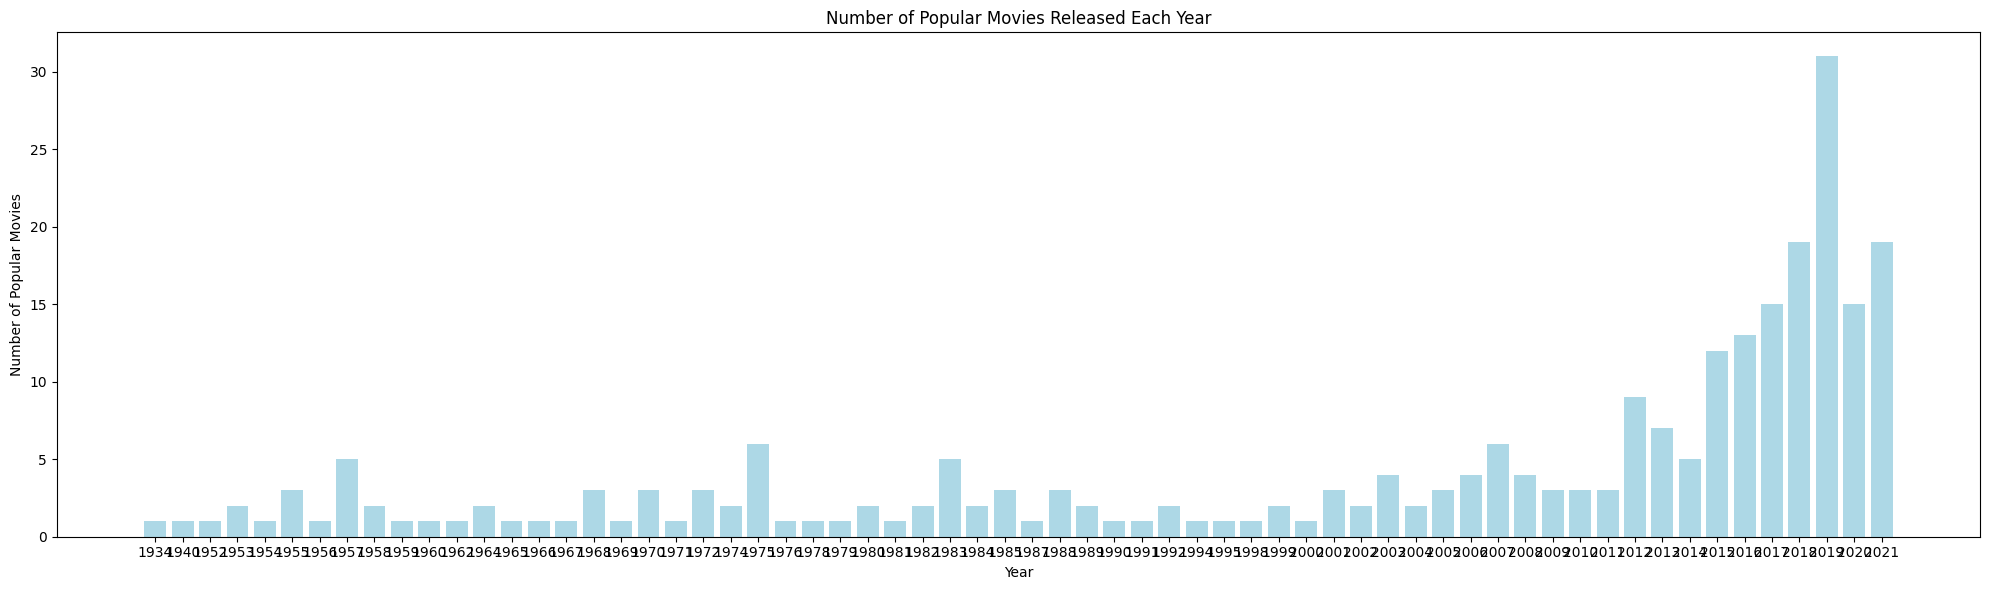

In [8]:
# Define the threshold for a "popular" movie
popular_threshold = 8.0

# Filter the DataFrame to include only popular movies
popular_movies = df[df['Rating'] >= popular_threshold]

# Group the popular movies by year and count the number of movies per year
popular_movies_by_year = popular_movies.groupby('Year').size().reset_index(name='Number of Popular Movies')

# Create a bar graph to visualize the number of popular movies per year
plt.figure(figsize=(20, 6))
plt.bar(popular_movies_by_year['Year'].astype(str), popular_movies_by_year['Number of Popular Movies'], color='lightblue')
plt.xlabel('Year')
plt.ylabel('Number of Popular Movies')
plt.title('Number of Popular Movies Released Each Year')
plt.tight_layout()
plt.show()

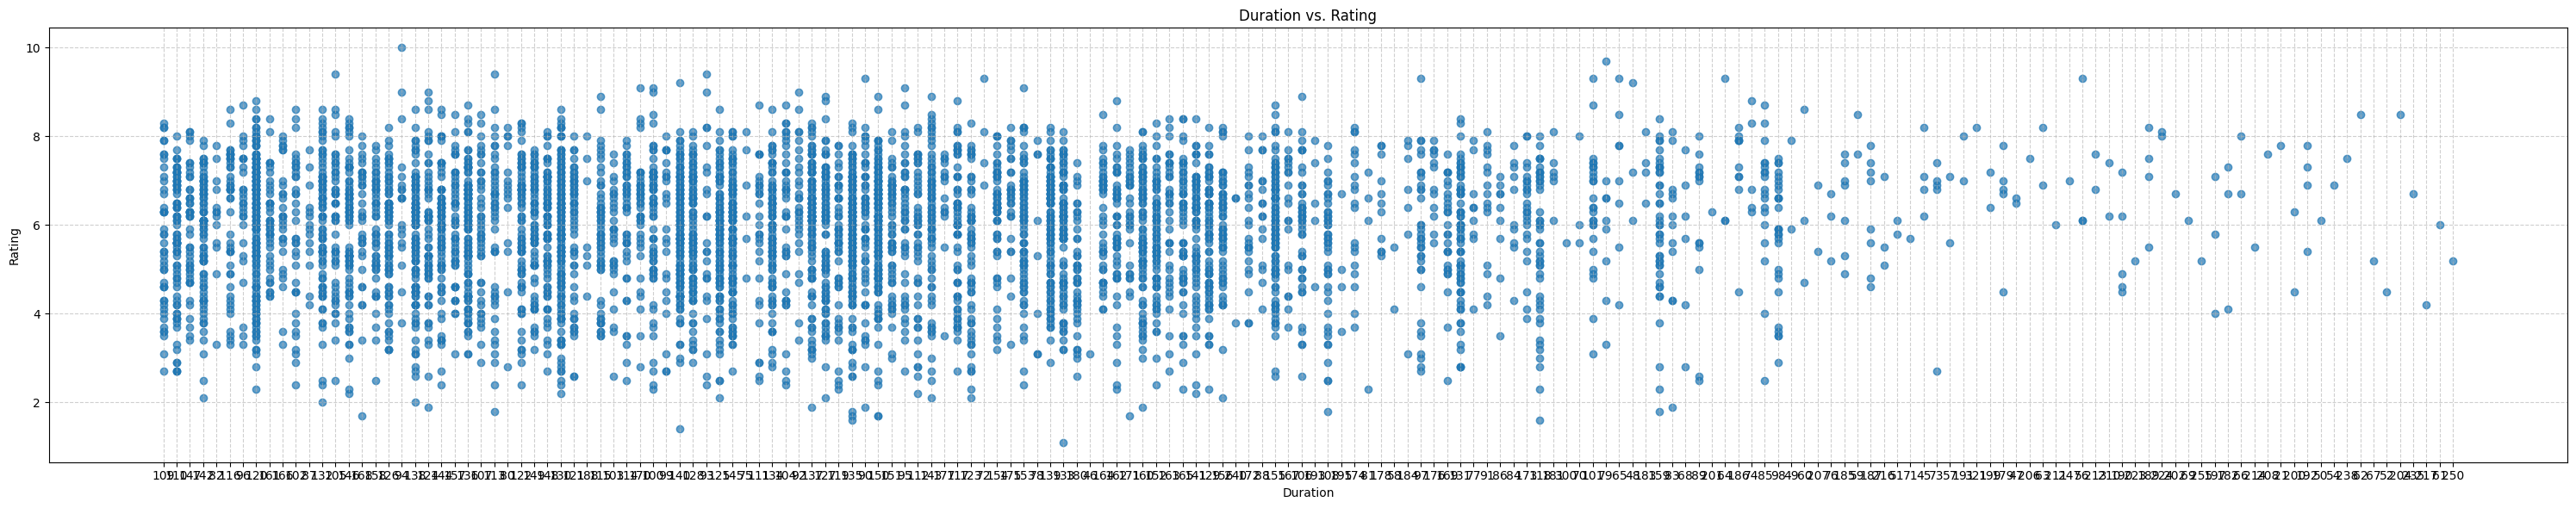

In [9]:
# Create a scatter plot to visualize the relationship between  duration and rating
plt.figure(figsize=(30, 6))
plt.scatter(df['Duration'], df['Rating'], alpha=0.7)
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.title('Duration vs. Rating')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

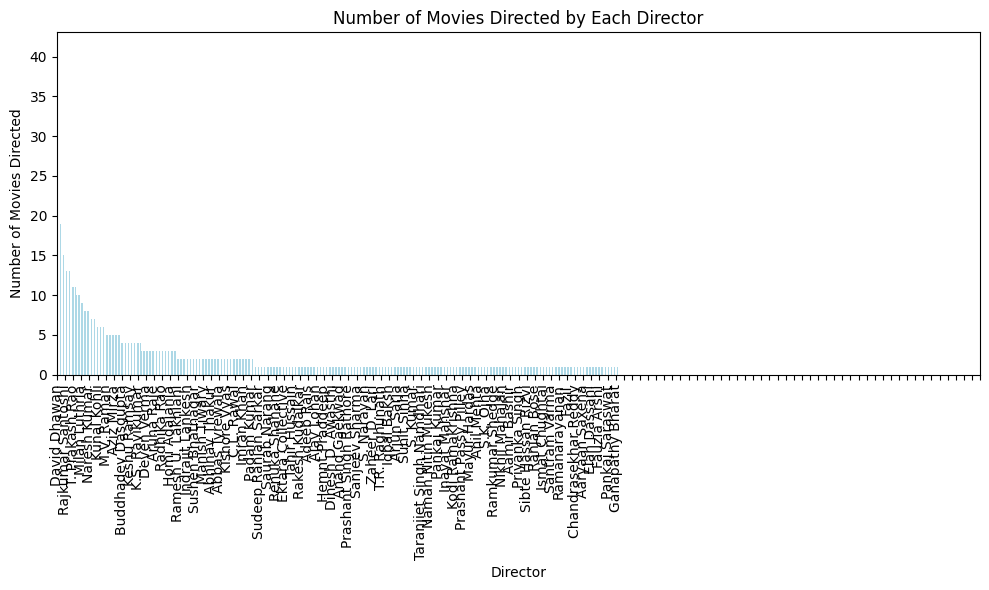

In [10]:
# Count the number of movies directed by each director
director_counts = df['Director'].value_counts()

# Create a bar graph to visualize the number of movies directed by each director
plt.figure(figsize=(10, 6))
director_counts.plot(kind='bar', color='lightblue')
plt.xlabel('Director')
plt.ylabel('Number of Movies Directed')
plt.title('Number of Movies Directed by Each Director')
plt.xticks(range(0,4000,35),rotation=90)
plt.tight_layout()
plt.show()

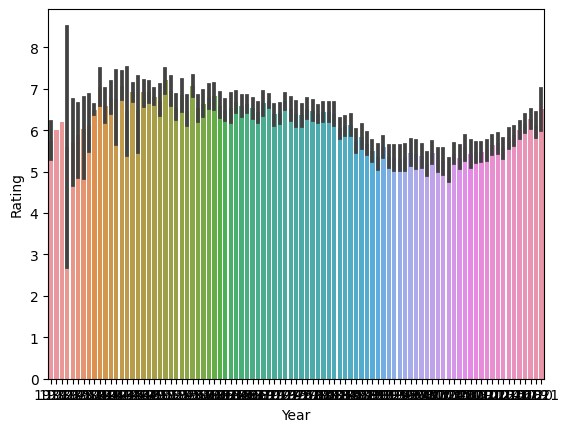

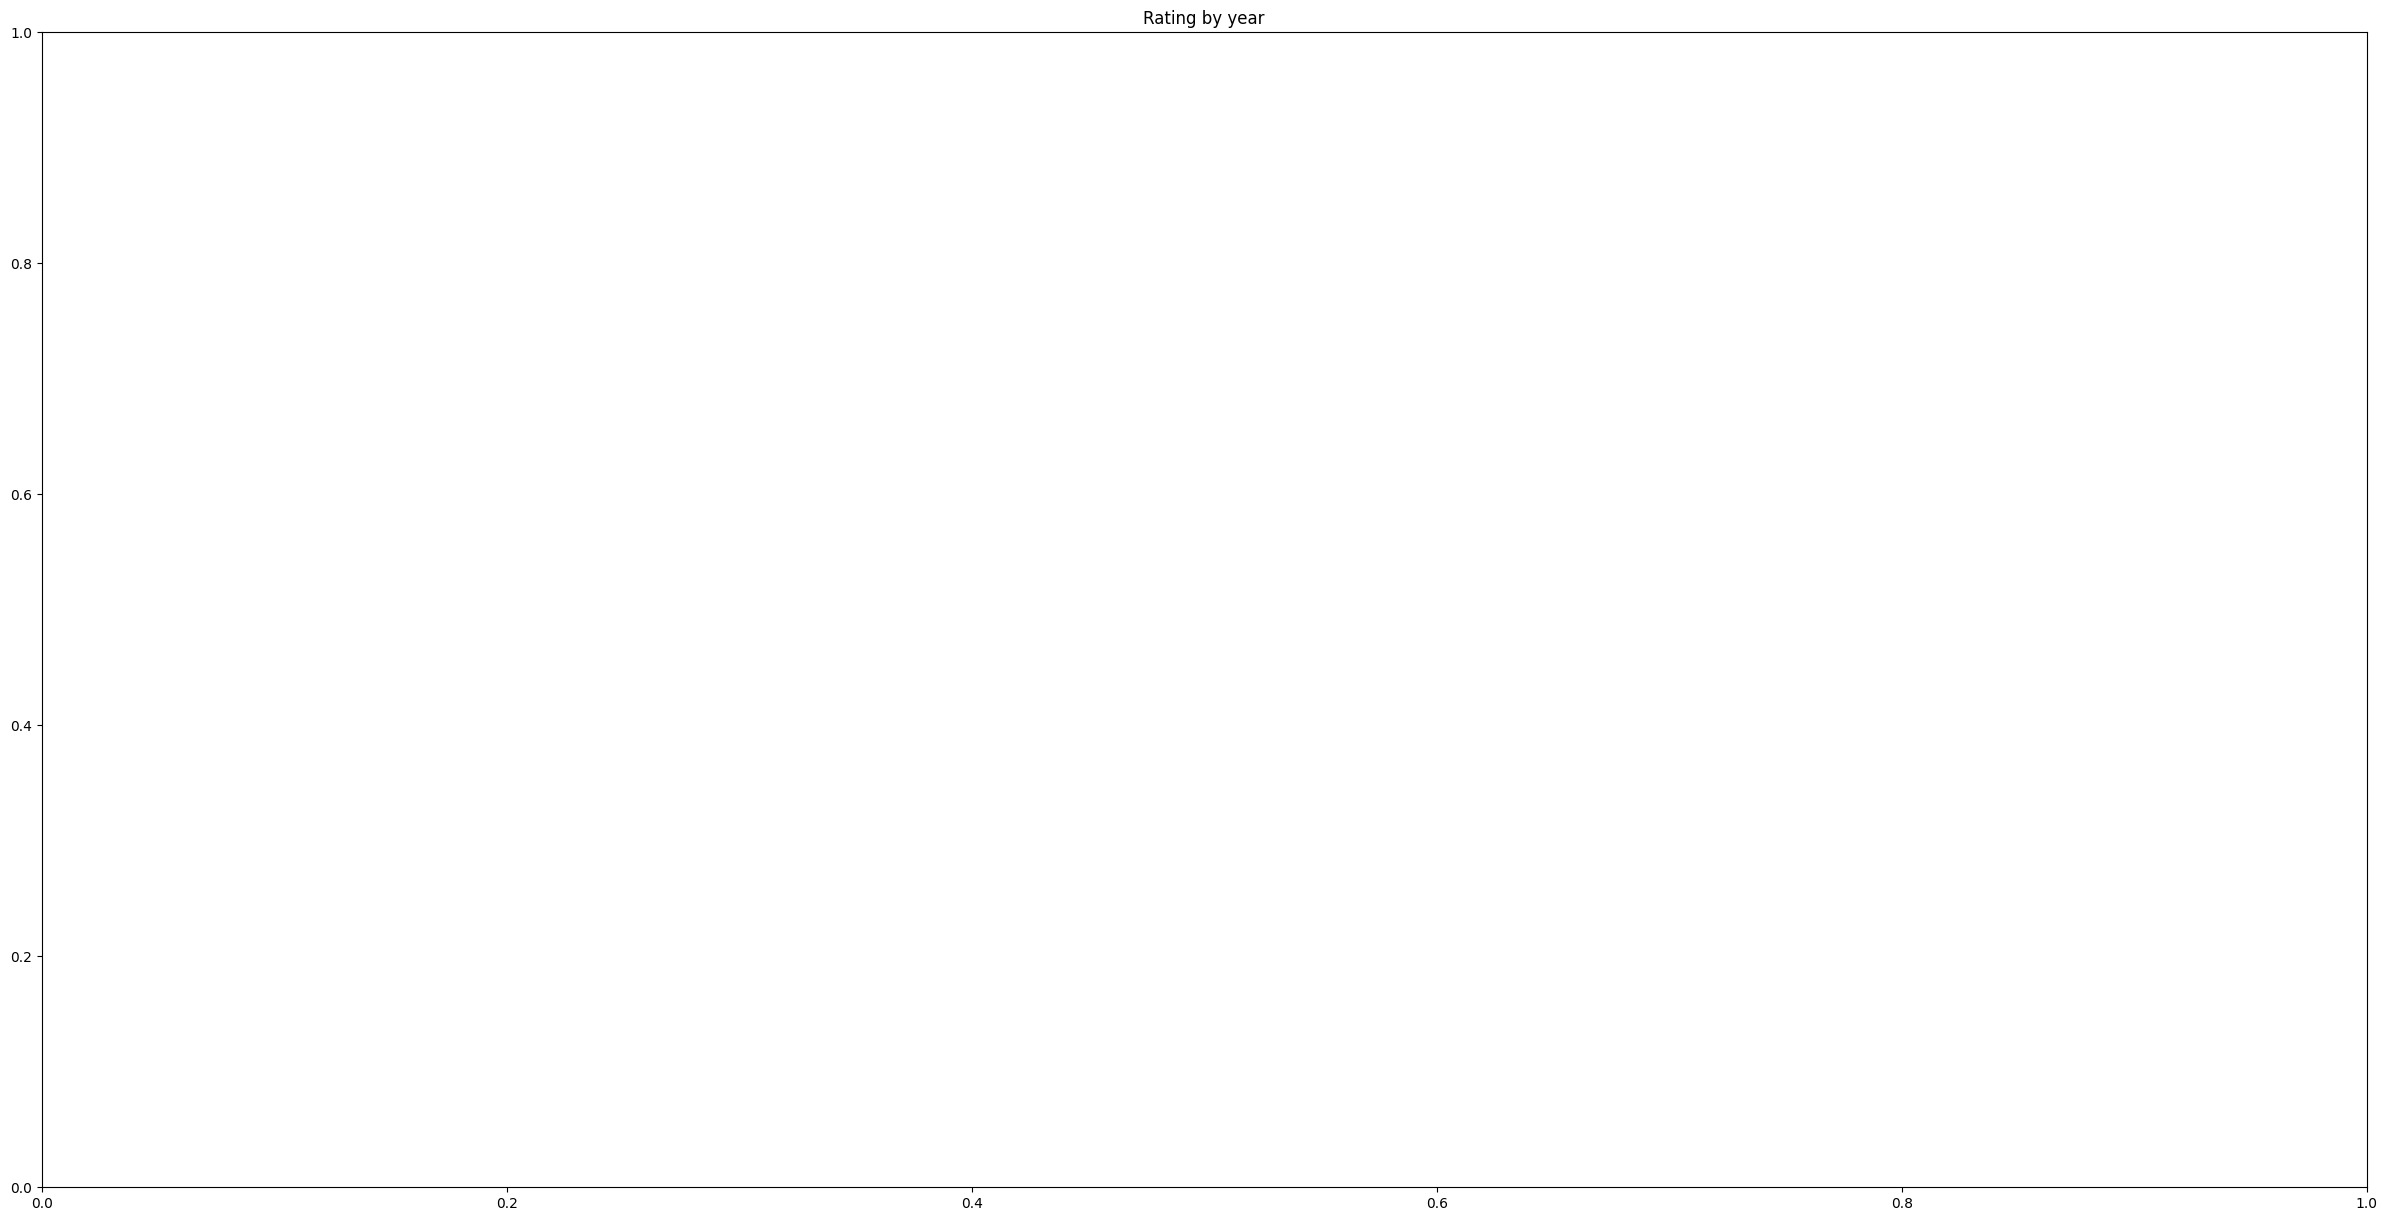

In [16]:
#In which year highest average rating
sns.barplot(x='Year', y='Rating', data=M_data)
plt.figure(figsize=(20, 6))
plt.title("Rating by year")
plt.show()

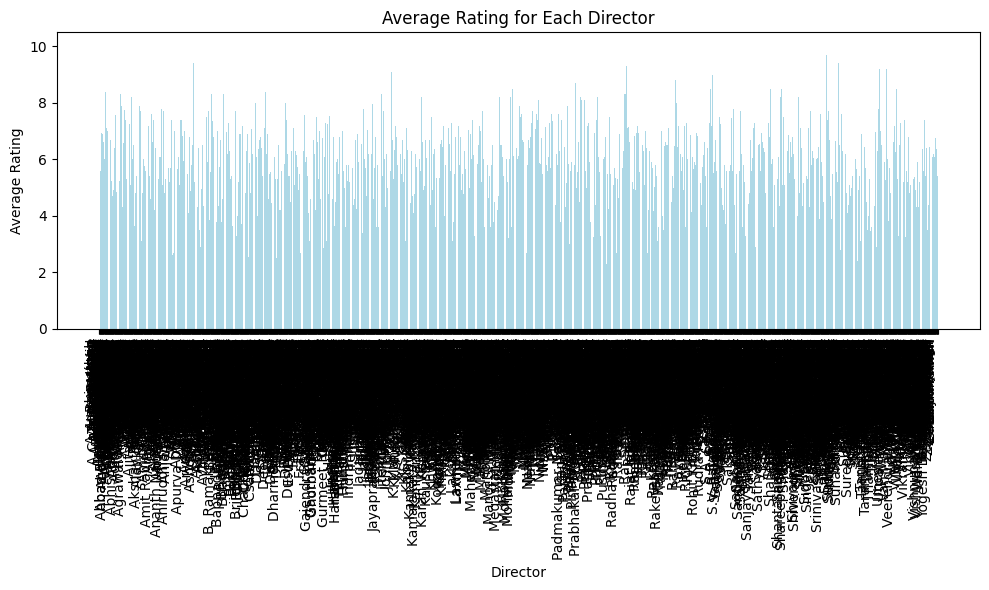

In [12]:
#Average Rating for each Director
# Group the data by director and calculate the average rating for each director
director_ratings = df.groupby('Director')['Rating'].mean().reset_index()

# Create a bar graph to visualize the average ratings
plt.figure(figsize=(10, 6))
plt.bar(director_ratings['Director'], director_ratings['Rating'], color='lightblue')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.title('Average Rating for Each Director')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Features Selection

In [ ]:
# Encode categorical features using LabelEncoder
label_encoders = {}
categorical_features = ['Genre', 'Director', 'Actor 1','Actor 2','Actor 3']

for feature in categorical_features:
    le = LabelEncoder()
    M_data[feature] = le.fit_transform(M_data[feature])
    label_encoders[feature] = le

# Define your features and target variable
X = M_data[['Genre', 'Director', 'Actor 1','Actor 2','Actor 3']]
y = M_data['Rating']

print(X)
print("\n")
print(y)

       Genre  Director  Actor 1  Actor 2  Actor 3
1        229       629     1352     2272      319
3        184      1335     1198      719     2148
5        157      1530      378       75     2045
6        289      2044      692     1112     2524
8        320       135     1934     1175     1013
...      ...       ...      ...      ...      ...
15493    229      1223     1861     1801     1615
15494    133      2059      763     1619     1184
15503     28      1793      406      754     1685
15505     38      1025      112     2164      314
15508     38       895      468      753      303

[5659 rows x 5 columns]


1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64


Splitting of Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training

In [ ]:
# Create and train the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model using RMSE and MAE and R-squared
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print()






Model: Linear Regression
RMSE: 1.35
MAE: 1.10
R2 Score: 0.01

Model: Decision Tree
RMSE: 1.81
MAE: 1.42
R2 Score: -0.77

Model: Random Forest
RMSE: 1.32
MAE: 1.05
R2 Score: 0.06

Model: Gradient Boosting
RMSE: 1.29
MAE: 1.04
R2 Score: 0.10

